# Quantum Fourier Transform

In [1]:
import qiskit
import numpy as np 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

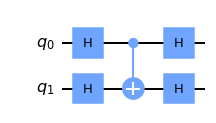

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.draw('mpl')

In [6]:
sv = Statevector.from_instruction(qc)
print(sv)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


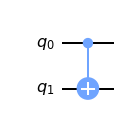

In [13]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
op=Operator(qc)
qc.draw('mpl')

In [14]:
sv = Statevector.from_instruction(qc)
print(op)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


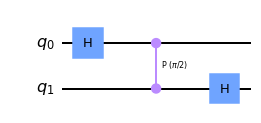

In [41]:
qc0 = QuantumCircuit(2)
qc0.h(0)
qc0.cp(np.pi/2, 1, 0)
qc0.h(1)
# qc0.swap(0,1)
qc0.draw('mpl')

In [46]:
op0 = Operator(qc0)  
np.round(2*op0,2)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j,  0.+1.j, -0.-1.j],
       [ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j, -0.-1.j,  0.+1.j]])

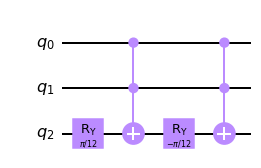

In [17]:
t0 = np.pi/6
qc0 = QuantumCircuit(3)
qc0.mcry(t0,[0,1],2)
qc0.draw('mpl')

In [19]:
sv0 = Statevector.from_instruction(qc0)
print(sv0)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


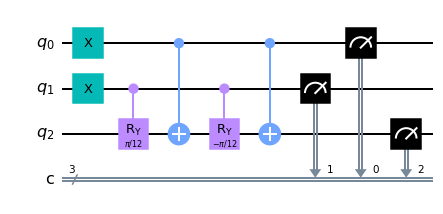

In [48]:
t1 = np.pi/6
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# define a quantum register with a single qubit
q = QuantumRegister(3,"q")
# define a classical register with a single bit
c = ClassicalRegister(3,"c")

qc1 = QuantumCircuit(q,c)
qc1.x(0)
qc1.x(1)
qc1.cry(t1/2,1,2)
qc1.cx(0,2)
qc1.cry(-t1/2,1,2)
qc1.cx(0,2)
qc1.measure(q,c)
qc1.draw('mpl')

<BarContainer object of 2 artists>

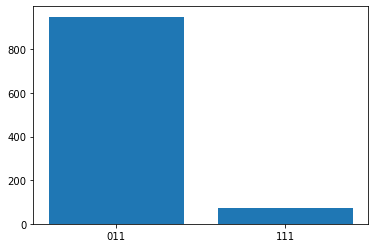

In [49]:
import qiskit_aer as aer
import matplotlib.pyplot as plt
# run the quantum circuit
backend = aer.QasmSimulator(method='statevector')
job = execute(qc1, backend)
result = job.result()
# obtain the result
counts = result.get_counts(qc1)
plt.bar(counts.keys(), counts.values())

In [20]:
sv1 = Statevector.from_instruction(qc1)
print(sv1)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [21]:
qc1.measure_all()

In [ ]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

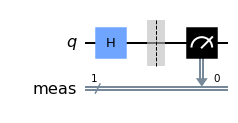

In [3]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

<BarContainer object of 2 artists>

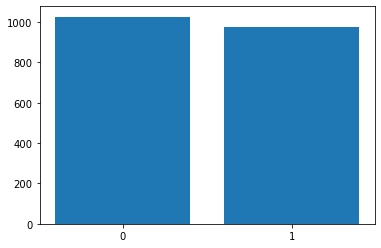

In [7]:
import qiskit_aer as aer
import matplotlib.pyplot as plt
# run the quantum circuit
backend = aer.QasmSimulator(method='statevector',shots = 2000)
job = execute(qc, backend)
result = job.result()
# obtain the result
counts = result.get_counts(qc)
plt.bar(counts.keys(), counts.values())

In [8]:
print(counts.values())

dict_values([1026, 974])


In [9]:
print(counts)

{'0': 1026, '1': 974}
